## Overview



## Explanation

Adaboost is often used together with DecisionTree

Adaboost combines a lot of weak learners to make classification

### stump

A tree node with two leaves

### weights

each weight are initialized to be equal, i.e. $\frac{1}{n}$

### total error (of a stump)

the sum of weights of all incorrectly classified samples

### amount of say

given by $\frac{1}{2}\log{\frac{1-TE}{TE}}$

the value can be negative for bad stumps, which will vote in the exact opposite direction

a graphical plot of **amount of say** against the **total error** looks like a verticalized **sigmoid** function

### smoothing

done to prevent `total error` to be exact 1 or 0

### resampling

whenever a sample is classified incorrect, more weight is given to it

`equation incorrect` $\text{new sample weight} = \text{sample weight} * e^{\text{amount of say}}$

`equation correct` $\text{new sample weight} = \text{sample weight} * e^{-\text{amount of say}}$

we then draws a random collection of samples based on the new weights **with replacement**

### Adaboost

In a **forest of stumps** made with **Adaboost**, some stumps gets more weight / are more important than others

The order in which the stumps are made is important, unlike what happens in **Random Forest**

## Data

In [1]:
import pickle
train_X, train_y, test_X, test_y = pickle.load(open('terrain_data.pkl', 'rb'))

## Starter Code

In [3]:
from sklearn.ensemble import AdaBoostClassifier

X, y = train_X, train_y

clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)

clf.score(X, y) # train accuracy

0.992

In [4]:
from sklearn.metrics import accuracy_score
pred_y = clf.predict(test_X)
accuracy_score(test_y, pred_y)

0.924

In [5]:
from class_viz import prettyPicture

C:\Users\ng572\Desktop\scikit-learn-quickstart\class_viz.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)


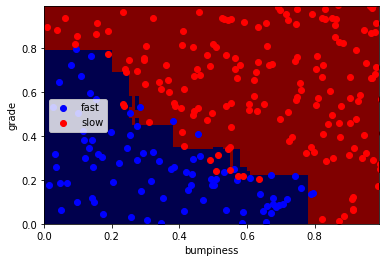

In [6]:
prettyPicture(clf, test_X, test_y)